In [52]:
# Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [53]:
# url_df_All_1 = 'https://github.com/saust1/Project-OptiC4/blob/e358d5172ac0b8fbb6fba776c0fe0a2b523b8b5c/3%20Feature%20Selection/contData_all_Avg%20-%201o2.csv?raw=true'
# url_df_All_2 = 'https://github.com/saust1/Project-OptiC4/blob/e358d5172ac0b8fbb6fba776c0fe0a2b523b8b5c/3%20Feature%20Selection/contData_all_Avg%20-%202o2.csv?raw=true'

# df_All_1 = pd.read_csv(url_df_All_1, index_col=0)
# df_All_2 = pd.read_csv(url_df_All_2, index_col=0)

In [54]:
df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# Concatenate (union) the dataframes
df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

print(df_All.head())

   425_pct_Al  M_Value  C4_pct_Eth  C4_pct_H2O  HydWtr_pct_Ammonia   DI55152  \
0    6.307630  3.50893    2.508420    21.96340            0.908765  0.925255   
1    6.308335  3.50863    2.511135    21.96865            0.907643  0.924281   
2    6.309390  3.50818    2.515210    21.97655            0.905959  0.923773   
3    6.310090  3.50788    2.517925    21.98185            0.904837  0.924103   
4    6.310790  3.50758    2.520640    21.98715            0.903715  0.924258   

    FC55003       FC55552      FC55569  FFC55553  FFC55555    LC55555  \
0  4919.290  41564.100000  6918.110000  0.996975  0.751501  59.968800   
1  5039.445  41558.250000  6919.960000  0.998847  0.750588  59.932300   
2  5268.620  41524.066667  6916.486667  0.998648  0.750505  60.002433   
3  5349.320  41500.275000  6918.470000  1.000349  0.750325  60.015925   
4  5563.165  41466.625000  6915.790000  1.000862  0.750021  60.020500   

    PI55004   TC55552     TI55021    Butanol  
0  1.306310  177.1880  212.861000

In [55]:
df_All.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Butanol'],
      dtype='object')

In [56]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [57]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = ['Octanol', 'Hexanol', 'Ethanol', 'Decanol',
       
#        'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 'TI55023',
#        'TC52015', 'FC52018', 'II52554', 'TI40050', 'VI52558B'
#                    ]

# # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

In [58]:
# df_All = df_All[df_All['Date'] > '2022-06-15 00:00:00']

# Remaining Features after Correlation Analysis

In [59]:

# selected_columns = ['425 %Al', 'Butanol', 'DI55102', 'DI55152', 'DI55580', 'FC42428',
#        'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
#        'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
#        'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555'
#                    ]

# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

In [60]:
# First Iteration
# selected_columns = ['Butanol PPM', '425 SAO Al', 'FC42428', 'FC55003', 'FC55102', 'FC55152', 'FFC55555',
#        'LC55553', 'LC55557', 'LC55568', 'LC90366', 'TC55555']




In [61]:
df_All.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Butanol'],
      dtype='object')

In [62]:
# Splitting into train and test
X = df_All.drop('Butanol', axis=1)  # Assuming 'target' is your target column
y = df_All['Butanol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#=============================================
# TRAIN & EVALUATE REGRESSION MODEL
#=============================================

#fit simple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Butanol   R-squared (uncentered):                   0.565
Model:                            OLS   Adj. R-squared (uncentered):              0.565
Method:                 Least Squares   F-statistic:                              4877.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                        0.00
Time:                        19:33:51   Log-Likelihood:                     -2.0304e+05
No. Observations:               56390   AIC:                                  4.061e+05
Df Residuals:                   56375   BIC:                                  4.063e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [64]:
# Convert summary to DataFrame
summary_table = model.summary().tables[1]
summary_df = pd.DataFrame(summary_table.data[1:], columns=summary_table.data[0])

# Convert necessary columns to numeric
numeric_cols = ['coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
summary_df[numeric_cols] = summary_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply the filter for insignificance and CI crossing zero
threshold = 0.05
filtered_df = summary_df[(summary_df['P>|t|'] > threshold) & ((summary_df['[0.025'] < 0) & (summary_df['0.975]'] > 0))]

# Extracting the feature names
insignificant_features = filtered_df.iloc[:, 0].tolist()  # First column contains feature names
print(insignificant_features)


[]


In [65]:
print(filtered_df)

Empty DataFrame
Columns: [, coef, std err, t, P>|t|, [0.025, 0.975]]
Index: []


In [66]:
# Filter for significant features
significant_df = summary_df[(summary_df['P>|t|'] <= threshold) & ((summary_df['[0.025'] > 0) | (summary_df['0.975]'] < 0))]
significant_features = significant_df.iloc[:, 0].tolist()
print("\nSignificant Features:")
print(significant_features)


Significant Features:
['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021']


ValueError: x and y must be the same size

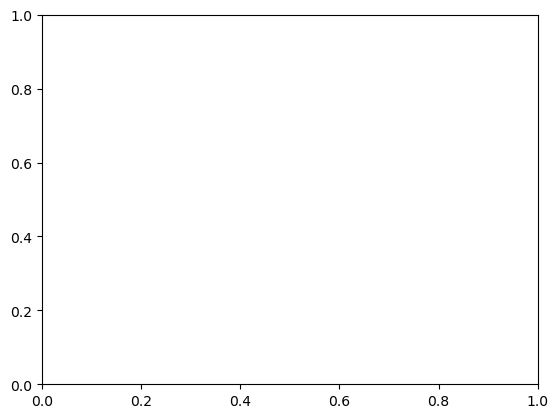

In [69]:
import matplotlib.pyplot as plt
# Adding a constant to the model (for the intercept)
X_sm = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X_sm).fit()

# Make predictions
predictions = model.predict(X_sm)

# Plotting
plt.scatter(X, y, alpha=0.5)  # Scatter plot of the data
plt.plot(X, predictions, color='red')  # Regression line
plt.title('Scatter plot with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()